# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")


import warnings
warnings.filterwarnings('ignore')

In [133]:
#First, I read the data file.
data=pd.read_csv("data.csv")

In [134]:
#Then, I dropped the data I won't use because they were unrelated
data.drop(["Z_CostContact", "Z_Revenue","Unnamed: 0", "ID","Dt_Customer"], axis=1,inplace=True)
#I filled the nan income values with median values of income column 
data["Income"].fillna(data["Income"].median(),inplace=True)
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


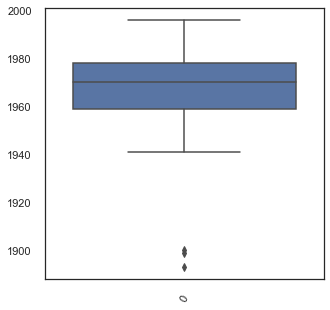

In [135]:
#Then I checked the Year_Birth column for edge cases, I found them
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["Year_Birth"], ax=ax)

In [136]:
#I dropped the outliers
data.drop(data[data["Year_Birth"]<1941].index, inplace=True)

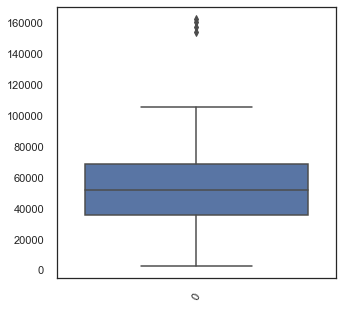

In [137]:
#I did the same thing for Income values
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["Income"], ax=ax)


In [138]:
#I dropped the outliers
data.drop(data[data["Income"]>120000].index, inplace=True)

In [139]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')

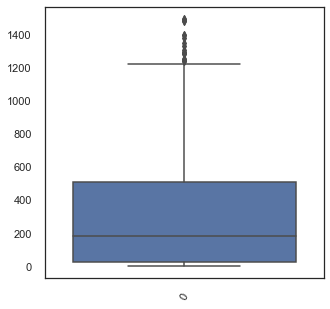

In [140]:
#Then I checked the Mnt values before make them one column, I dropped the outliers.
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntWines"], ax=ax)

In [141]:
(data["MntWines"]>1200).value_counts()

False    974
True      20
Name: MntWines, dtype: int64

In [142]:
data.drop(data[data["MntWines"]>1200].index, inplace=True)

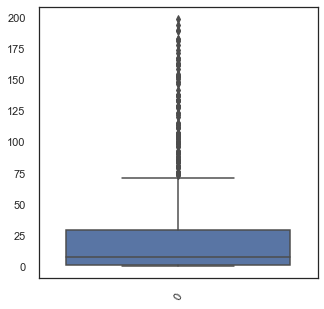

In [143]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntFruits"], ax=ax)

In [144]:
#I didn't consider them as outliers because they are more than %10
(data["MntFruits"]>75).value_counts()

False    860
True     114
Name: MntFruits, dtype: int64

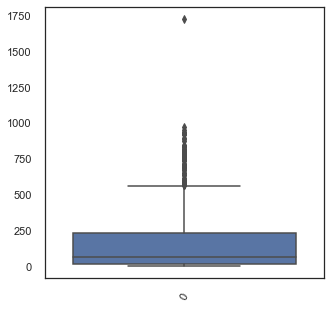

In [145]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntMeatProducts"], ax=ax)

In [146]:
(data["MntMeatProducts"]>1250).value_counts()

False    973
True       1
Name: MntMeatProducts, dtype: int64

In [147]:
data.drop(data[data["MntMeatProducts"]>1250].index, inplace=True)

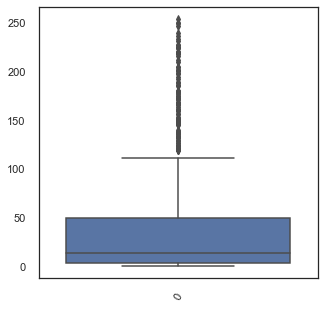

In [148]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntFishProducts"], ax=ax)

In [149]:
#I didn't consider them as outliers because they are more than %10
(data["MntFishProducts"]>110).value_counts()

False    861
True     112
Name: MntFishProducts, dtype: int64

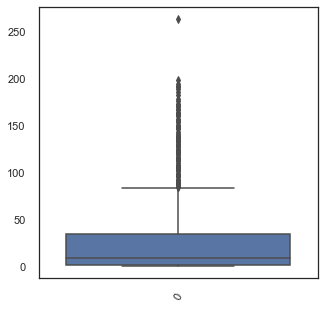

In [150]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntSweetProducts"], ax=ax)

In [151]:
(data["MntSweetProducts"]>210).value_counts()

False    972
True       1
Name: MntSweetProducts, dtype: int64

In [152]:
data.drop(data[data["MntSweetProducts"]>210].index, inplace=True)

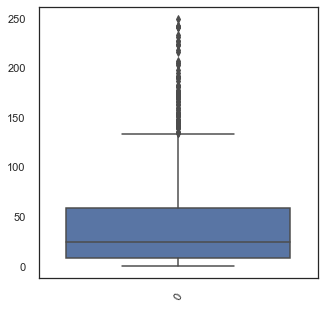

In [153]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data["MntGoldProds"], ax=ax)

In [154]:
#I didn't consider them as outliers because they are approximately %10
(data["MntGoldProds"]>140).value_counts()

False    891
True      81
Name: MntGoldProds, dtype: int64

In [155]:
#Then, I wanted to see the Education and Marital_Status types to make them numerical
print(data["Education"].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [156]:
print(data["Marital_Status"].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone']


In [157]:
data["Marital_Status"].value_counts()

Married     361
Together    246
Single      217
Divorced    108
Widow        37
Alone         3
Name: Marital_Status, dtype: int64

In [158]:
# I changed the categorical values to numerical values
list={'Basic':0, 'Graduation':1, 'PhD':2, 'Master':3, '2n Cycle':0,'Single':0,
      'Together':1, 'Married':2, 'Divorced':3 ,'Widow':3 ,'Alone':0}
#I combine the 2n Cycle and Basic because basic includes 2n Cycle
#I combine the Widow with Divorced, combine the single with alone because widow and alone counts are small


In [159]:
data=data.replace(list)

In [160]:
data.insert(4, "Spent", data.iloc[:,7:13].sum(axis=1))
data.drop(data.iloc[:,8:14],axis=1,inplace=True)

In [161]:
data["KidTypeCount"]=data["Kidhome"]+data["Teenhome"]
data.drop(columns=["Kidhome","Teenhome"], inplace=True)
data.insert(5,"KidCounts", data["KidTypeCount"])
data.drop(columns="KidTypeCount", inplace=True)

In [162]:
data.info()
#Customer-Type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 1000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           972 non-null    int64  
 1   Education            972 non-null    int64  
 2   Marital_Status       972 non-null    int64  
 3   Income               972 non-null    float64
 4   Spent                972 non-null    int64  
 5   KidCounts            972 non-null    int64  
 6   Recency              972 non-null    int64  
 7   NumDealsPurchases    972 non-null    int64  
 8   NumWebPurchases      972 non-null    int64  
 9   NumCatalogPurchases  972 non-null    int64  
 10  NumStorePurchases    972 non-null    int64  
 11  NumWebVisitsMonth    972 non-null    int64  
 12  AcceptedCmp3         972 non-null    int64  
 13  AcceptedCmp4         972 non-null    int64  
 14  AcceptedCmp5         972 non-null    int64  
 15  AcceptedCmp1         972 non-null    in

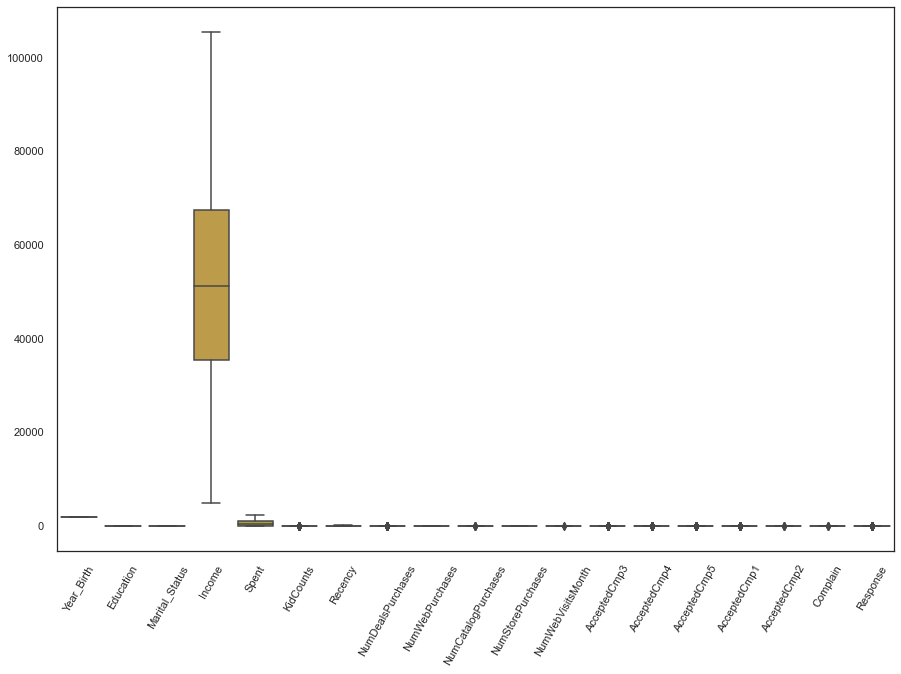

In [163]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.boxplot(data=data, ax=ax)

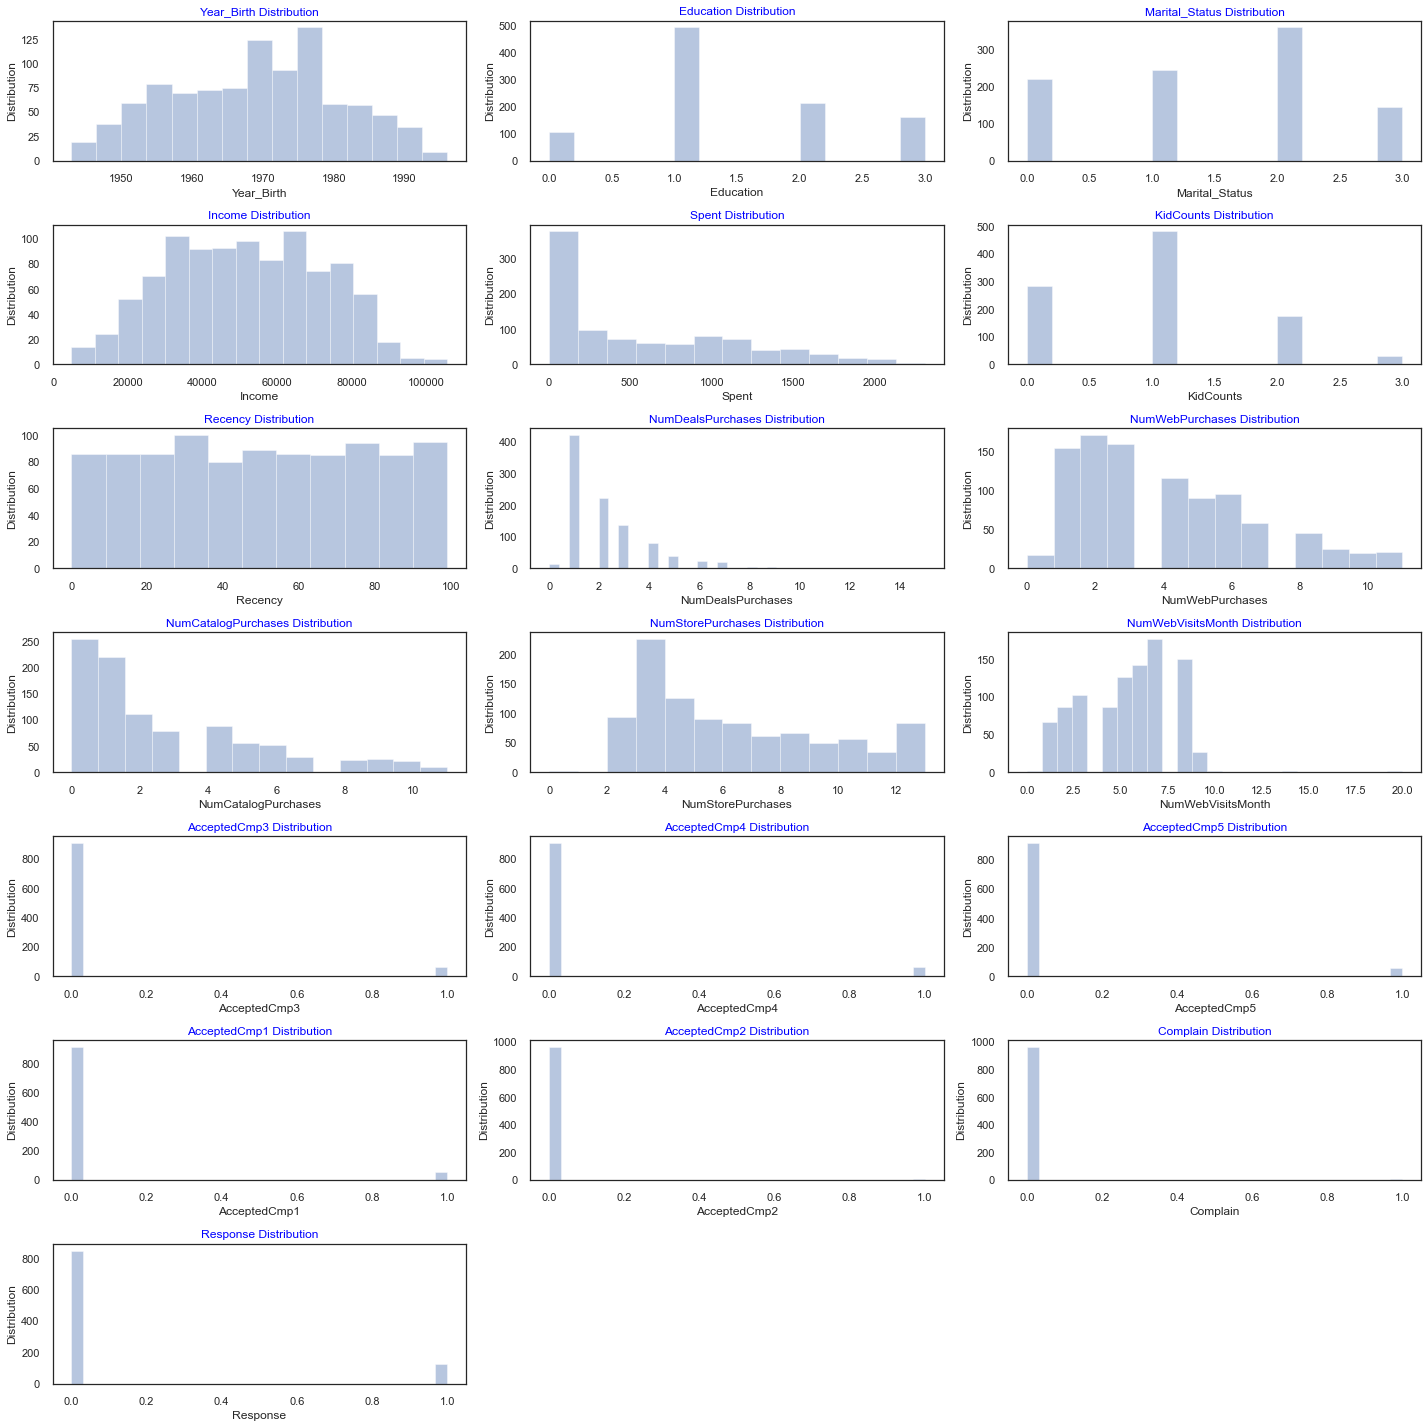

In [164]:
#I plotted the distrubition graphs
f=plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    ax=f.add_subplot(7,3,i+1)
    sns.distplot(data[col],kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
f.tight_layout()

In [165]:
#I dropped the discrete variables before correlation
corr = (data.drop(columns=['Complain','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Marital_Status','Education'])).corr()


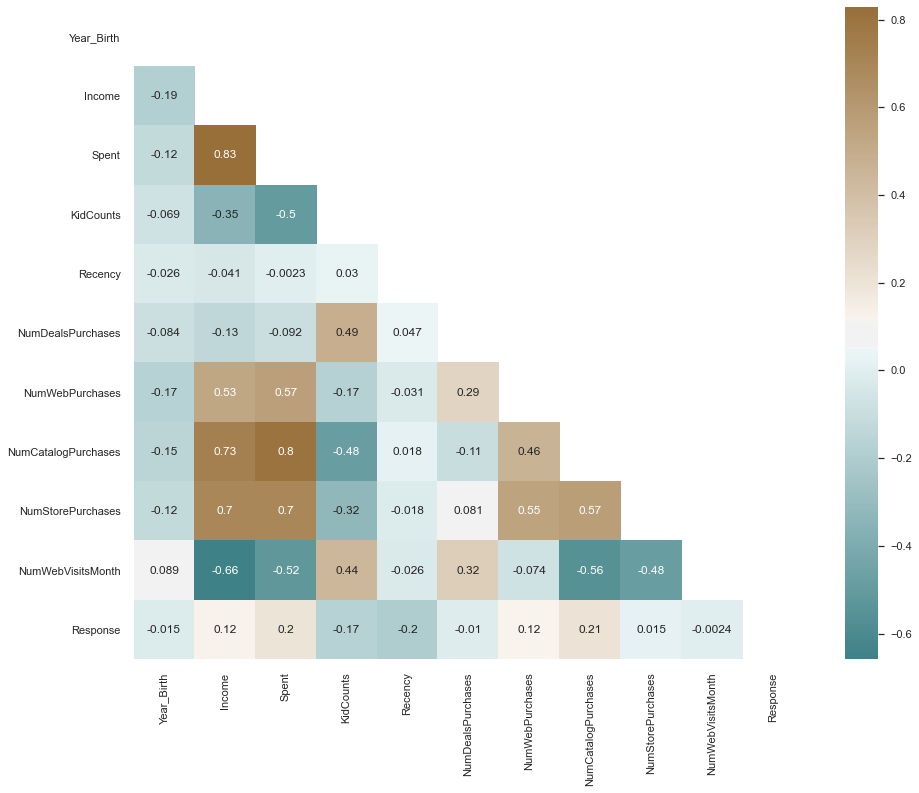

In [166]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(200, 50, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True)


In [167]:
#Normalizing
#We use standardScaler() to normalize our dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(data)


In [168]:
df_scaled = pd.DataFrame(Scaled_df,columns=data.columns)
df_scaled.head()

,Year_Birth,Education,Marital_Status,Income,Spent,KidCounts,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.027237,-0.492001,-1.444986,0.321662,1.787231,-1.228730,0.306035,0.413934,1.544161,2.637036,-0.574120,0.717966,-0.263262,-0.263262,-0.242536,-0.24959,-0.091098,-0.08517,2.603075
1,-1.282841,-0.492001,-1.444986,-0.254547,-0.972467,1.359191,-0.388087,-0.159206,-1.151188,-0.588015,-1.192795,-0.120308,-0.263262,-0.263262,-0.242536,-0.24959,-0.091098,-0.08517,-0.384161
2,-0.345626,-0.492001,-0.443898,0.979998,0.327541,-1.228730,-0.804559,-0.732345,1.544161,-0.229676,1.281905,-0.539445,-0.263262,-0.263262,-0.242536,-0.24959,-0.091098,-0.08517,-0.384161
3,1.273199,-0.492001,-0.443898,-1.216915,-0.927340,0.065230,-0.804559,-0.159206,-0.766138,-0.946354,-0.574120,0.298829,-0.263262,-0.263262,-0.242536,-0.24959,-0.091098,-0.08517,-0.384161
4,1.017595,0.630593,0.557190,0.329234,-0.286882,0.065230,1.555453,1.560214,0.389011,0.128663,0.044555,-0.120308,-0.263262,-0.263262,-0.242536,-0.24959,-0.091098,-0.08517,-0.384161


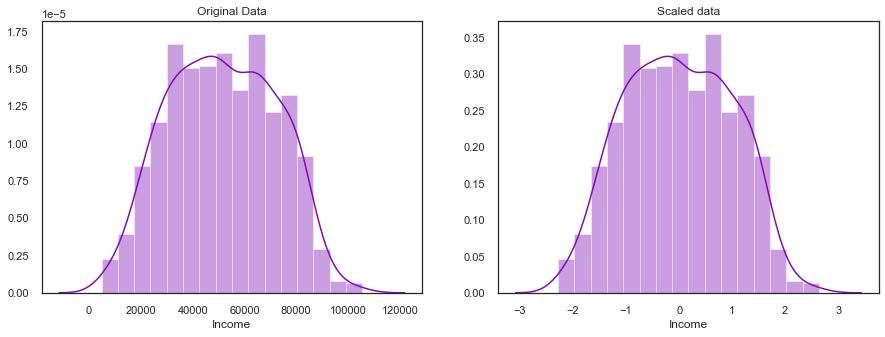

In [169]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.distplot(data['Income'], ax=ax[0],color='#7f0bb5')
ax[0].set_title("Original Data")
sns.distplot(df_scaled['Income'], ax=ax[1],color='#7f0bb5')
ax[1].set_title("Scaled data")
plt.show()

In [170]:
#Modelling
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(Scaled_df)

KMeans(n_clusters=6, random_state=0)

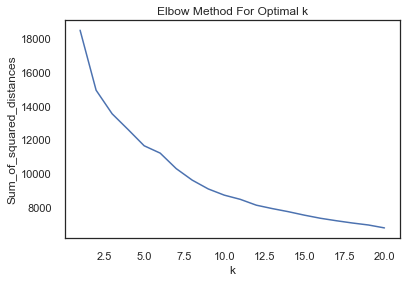

In [171]:
#Elbow Curve
Sum_of_squared_distances = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [172]:
#Silhouette Coefficient
from sklearn.metrics import silhouette_score, silhouette_samples

for n_clusters in range(2,21):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(Scaled_df)
    centers = km.cluster_centers_

    score = silhouette_score(Scaled_df, preds, metric='euclidean', random_state=0)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
#I choosed the optimal n_cluster as 3, in my searches people said 2 is global and not recommended. I decided on 3

For n_clusters = 2, silhouette score is 0.21579672457600543
For n_clusters = 3, silhouette score is 0.1939291344116825
For n_clusters = 4, silhouette score is 0.1620003469532283
For n_clusters = 5, silhouette score is 0.1766999474035813
For n_clusters = 6, silhouette score is 0.10674713983715893
For n_clusters = 7, silhouette score is 0.19131268629167636
For n_clusters = 8, silhouette score is 0.18106409974387333
For n_clusters = 9, silhouette score is 0.12280788055621744
For n_clusters = 10, silhouette score is 0.12949898462111942
For n_clusters = 11, silhouette score is 0.1411766554634122
For n_clusters = 12, silhouette score is 0.13113216310170644
For n_clusters = 13, silhouette score is 0.12819638259847213
For n_clusters = 14, silhouette score is 0.14394849639095111
For n_clusters = 15, silhouette score is 0.12496169739869606
For n_clusters = 16, silhouette score is 0.12648324279134454
For n_clusters = 17, silhouette score is 0.12464762538406039
For n_clusters = 18, silhouette scor

In [127]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


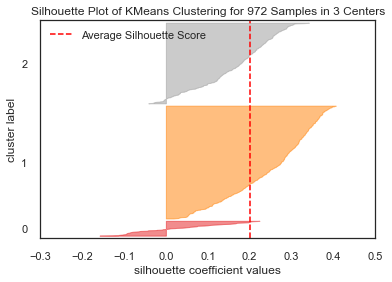

In [173]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() #poof the data

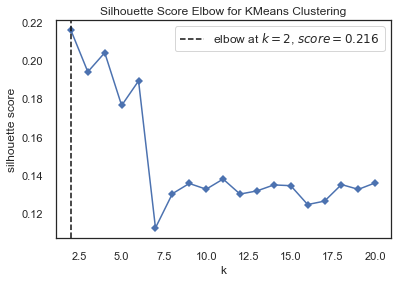

In [174]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=3)
visualizer = KElbowVisualizer(km, k=(2,21),metric ='silhouette', timings=False)

visualizer.fit(Scaled_df) # Fit the training data to the visualizer
visualizer.poof() # poof the data

In [175]:
kmeans.labels_

array([3, 1, 3, 1, 0, 0, 0, 1, 1, 5, 1, 1, 3, 0, 1, 2, 1, 1, 3, 1, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 3, 1, 3, 1, 1, 5, 3, 1, 1, 1, 1, 3,
       1, 1, 1, 0, 3, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 0, 0, 0, 3, 1, 1, 2,
       3, 0, 3, 1, 0, 0, 1, 1, 3, 5, 4, 5, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1,
       0, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 1, 3, 3, 0,
       2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 3, 3, 1, 0, 0, 0, 0, 3, 3, 0,
       3, 1, 1, 5, 1, 3, 3, 3, 0, 1, 0, 1, 4, 0, 1, 0, 0, 0, 1, 3, 2, 0,
       1, 1, 3, 1, 1, 3, 1, 5, 0, 3, 1, 1, 1, 1, 1, 5, 3, 2, 1, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 0, 3, 1, 5, 3, 1, 0, 1, 3, 2, 3, 5, 0, 3, 0, 2,
       1, 5, 5, 0, 1, 5, 0, 3, 0, 0, 3, 0, 1, 2, 0, 3, 1, 3, 3, 1, 0, 1,
       0, 0, 3, 1, 0, 2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 2, 0, 1, 3, 3, 0,
       1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 5, 0, 0, 1, 0, 1, 3, 5, 3, 1, 3, 4,
       1, 1, 1, 3, 3, 3, 2, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 0, 5, 1, 2, 1,
       1, 1, 1, 3, 0, 1, 0, 1, 1, 1, 3, 1, 2, 0, 1,

In [176]:
cluster_label = km.labels_
data['KMEANS_LABELS'] = cluster_label
data['KMEANS_LABELS'].value_counts()
#KMEAN_LABELS Value counts.

15    138
1      96
5      76
10     70
18     70
17     68
7      61
2      59
12     57
13     48
9      33
4      33
16     29
3      28
0      25
19     24
8      22
14     20
6       8
11      7
Name: KMEANS_LABELS, dtype: int64

In [177]:
data.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Spent',
       'KidCounts', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'KMEANS_LABELS'],
      dtype='object')

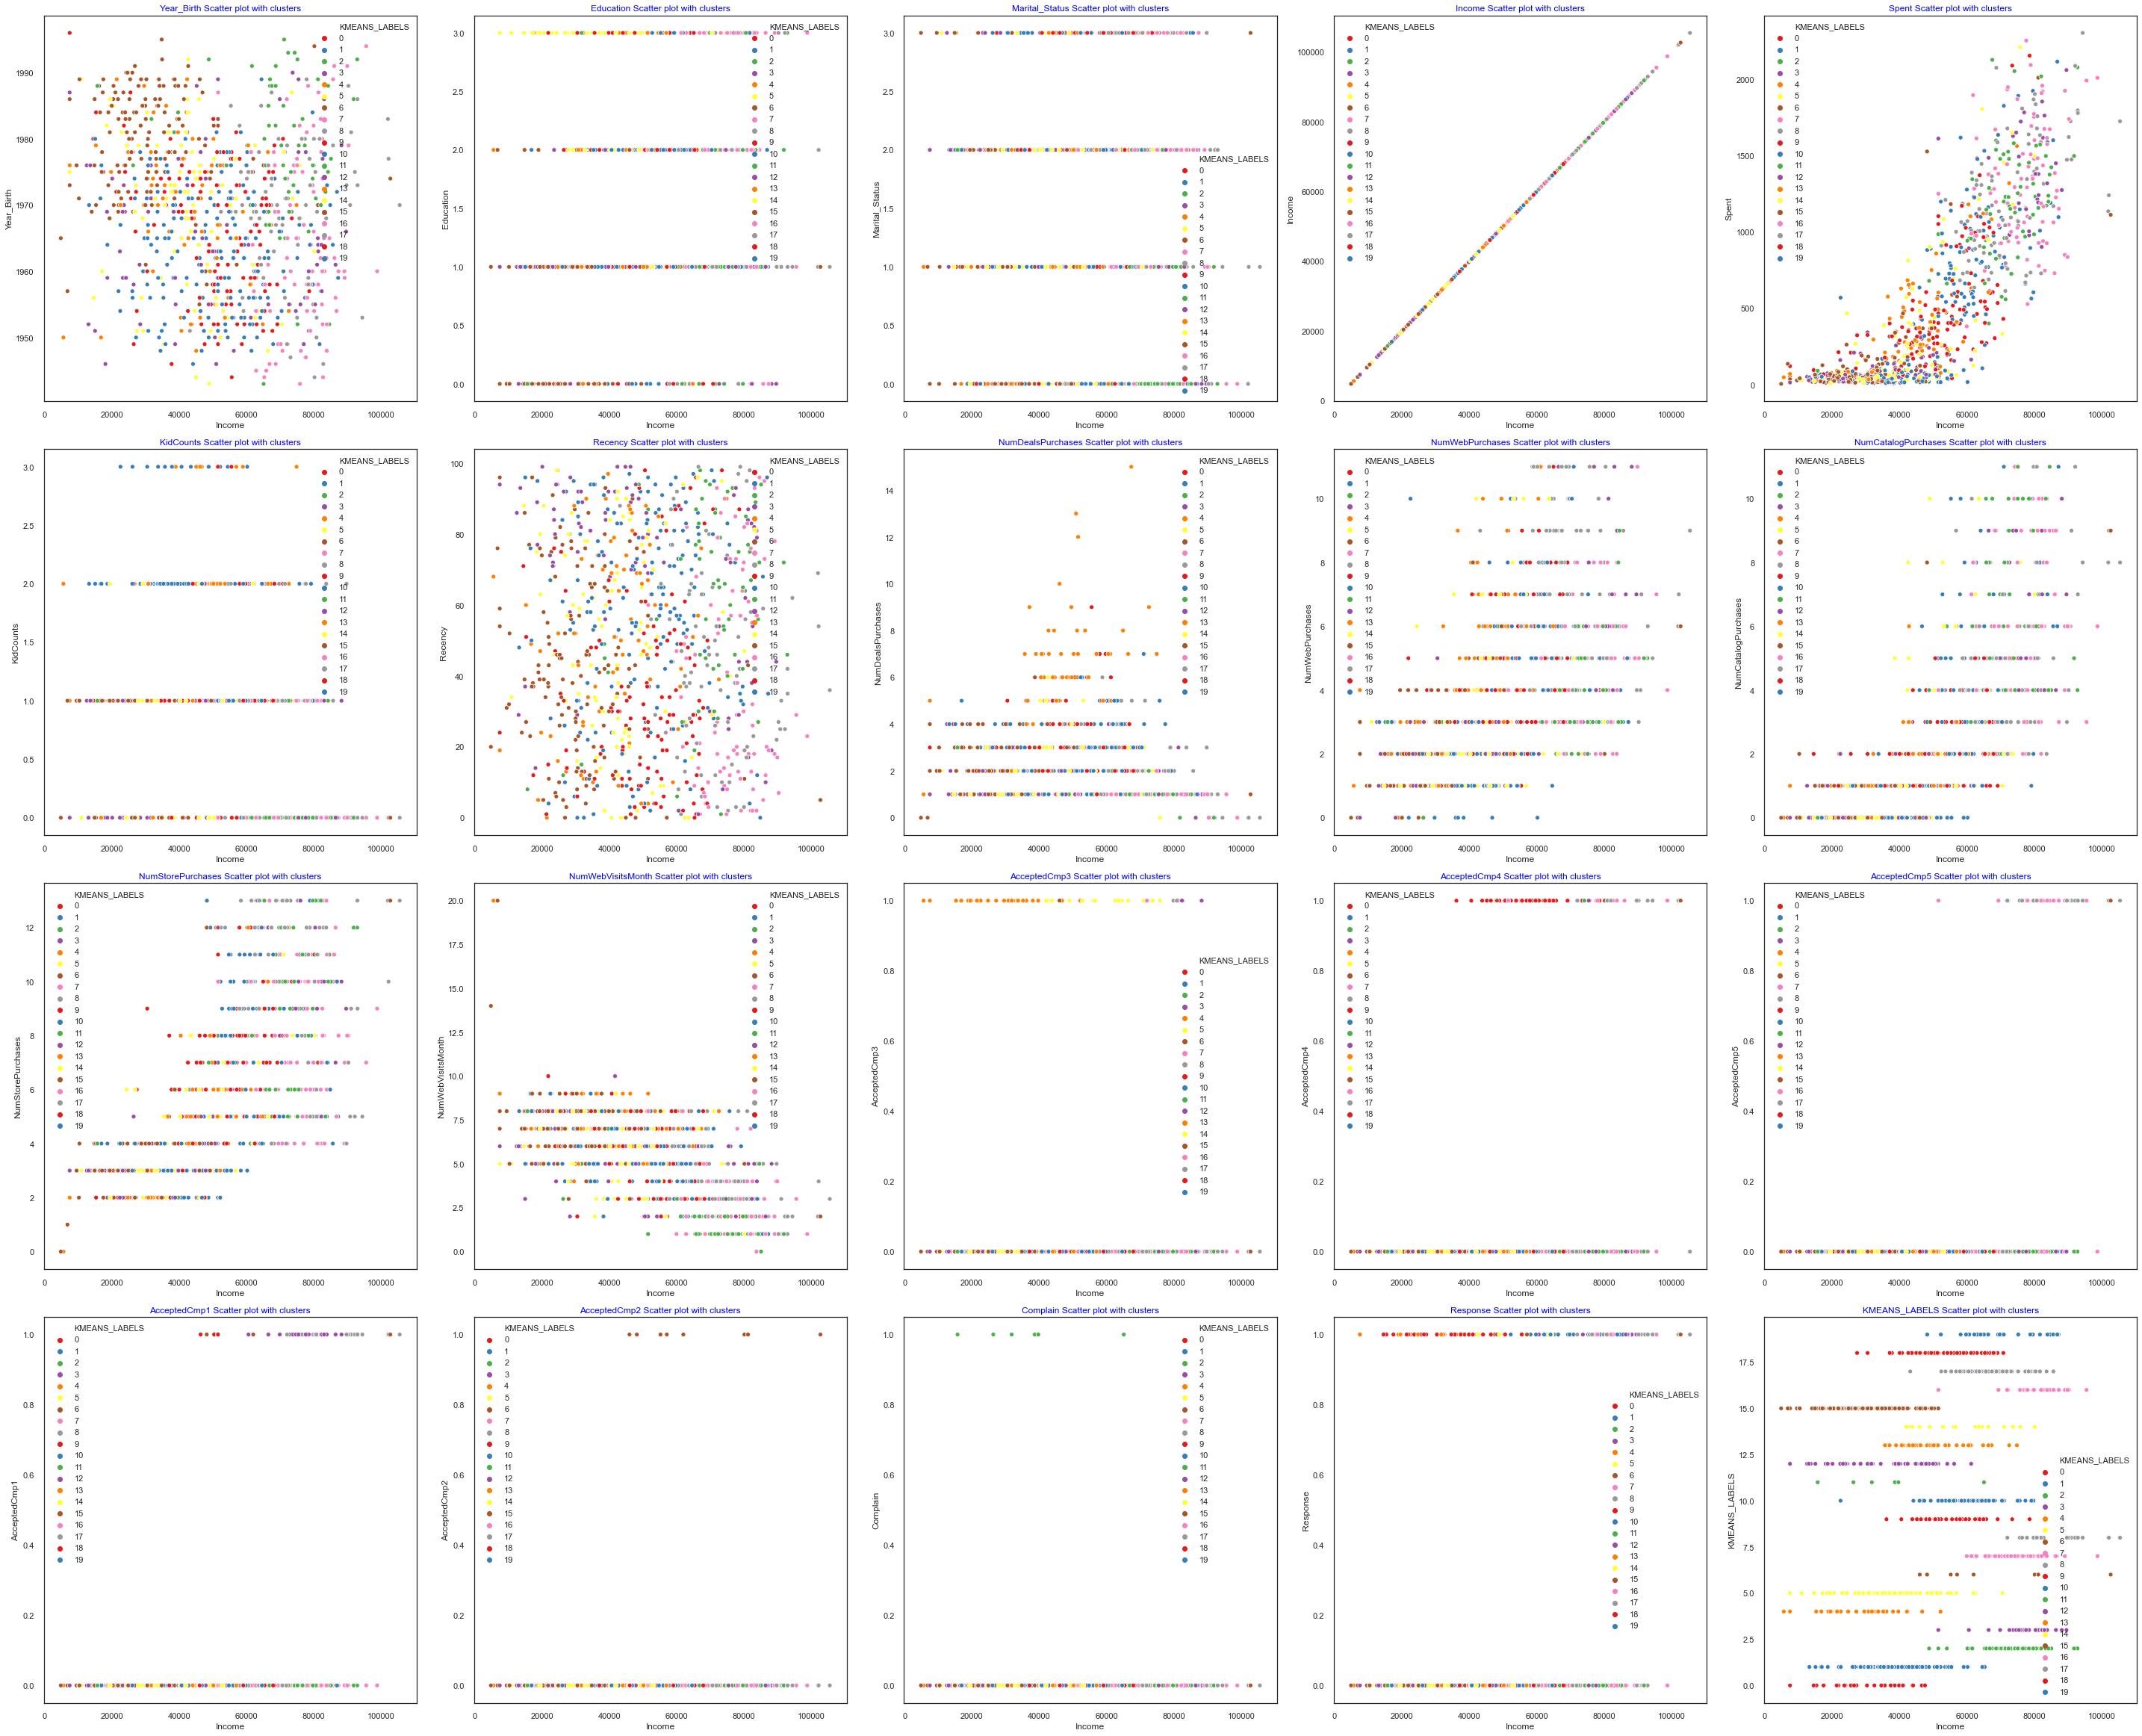

In [178]:
#I did the scatterplots for all columns

f=plt.figure(figsize=(40,40))
scatter_cols =['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Spent',
       'KidCounts', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'KMEANS_LABELS']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(5,5,i+1)
    sns.scatterplot(x=data['Income'],y=data[col],hue=data['KMEANS_LABELS'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

In [179]:
#K Means on selected features
sample_df = pd.DataFrame([data['Income'],data['Spent']])
sample_df = sample_df.T
sample_df.head()

,Income,Spent
0,58138.0,1617.0
1,46344.0,27.0
2,71613.0,776.0
3,26646.0,53.0
4,58293.0,422.0


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sample_Scaled_df = scaler.fit_transform(sample_df)

In [181]:
km_sample = KMeans(n_clusters=3)
km_sample.fit(Sample_Scaled_df)

KMeans(n_clusters=3)

In [182]:
labels_sample = km_sample.labels_
sample_df['label'] = labels_sample


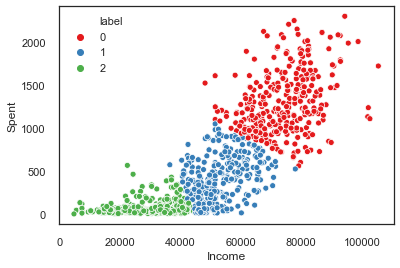

In [183]:
#I did the scatterplot with IncomexSpent
sns.set_palette('Set2')
sns.scatterplot(sample_df['Income'],sample_df['Spent'],hue=sample_df['label'],palette='Set1')

In [184]:
from sklearn.cluster import AgglomerativeClustering

In [185]:
import scipy.cluster.hierarchy as shc

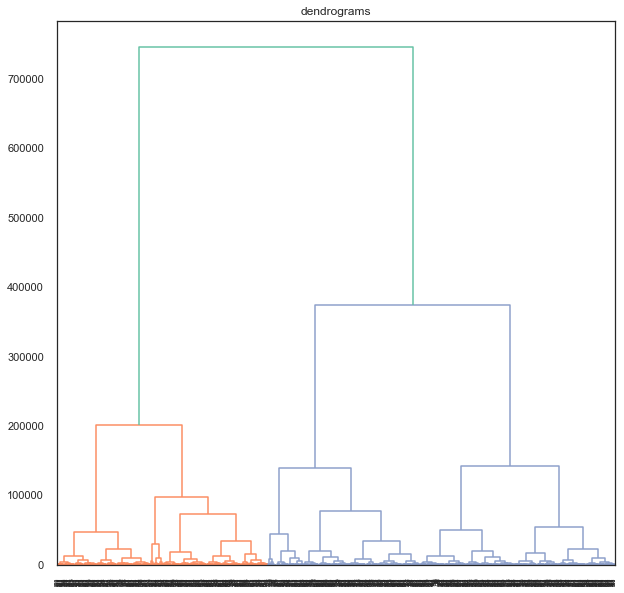

In [186]:
#I plot the dendrogram
plt.figure(figsize=(10,10))
plt.title("dendrograms")
dendrogram = shc.dendrogram(shc.linkage(sample_df,method='ward'))

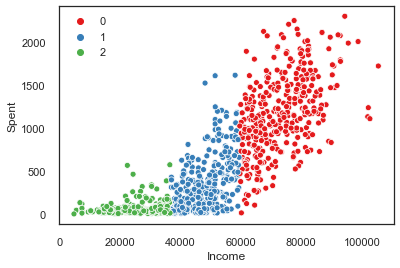

In [187]:
agg_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
result = agg_cluster.fit_predict(sample_df)
sns.scatterplot(x=sample_df['Income'], y=sample_df['Spent'], hue = result, palette = 'Set1')
plt.show()

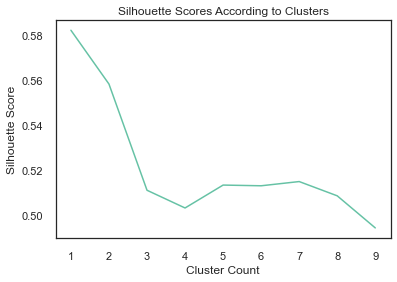

In [188]:
#To evaluate how “well clustered” data points are, I used the “silhouette score” and plot the Silhouette Scores for all of data points.
silhouette_scores = []
for n_clusters in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=n_clusters)  
    a = cluster.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, a))
    
plt.plot(range(1,10), silhouette_scores)
plt.title("Silhouette Scores According to Clusters")
plt.xlabel("Cluster Count")
plt.ylabel("Silhouette Score")
plt.show()